# Basic Model Testing

In [1]:
import os
import numpy as np 
import torch
from torch import nn
from torch.nn import functional as F 
import torch.utils.data as td
import torchvision as tv
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
#mod1 = torch.load('/datasets/home/27/827/ausant/ECE285 Project/MoDL_CenterNet/models/ctdet_coco_resdcn18.pth')

In [3]:
#for name in mod1['state_dict']:
#    print(name)

# Loading the Dataset

In [4]:
import os
import sys
sys.path.append(sys.path[0]+'/../lib') # Add library folder
#print(sys.path)

In [5]:
from opts import opts
from datasets.dataset_factory import get_dataset
from datasets.dataset.coco import COCO
from datasets.sample.ctdet import CTDetDataset

In [6]:
Dataset = get_dataset('coco', 'ctdet')

Create opt for passing to the constructor. \
Also pass a string with the training value

In [7]:
opt = type('', (), {})()
opt.data_dir = sys.path[0]+'/../../data/'
opt.task = 'ctdet'
split = 'train'

In [8]:
dataset = Dataset(opt,split)

==> initializing coco 2017 train data.
loading annotations into memory...
Done (t=14.82s)
creating index...
index created!
Loaded train 118287 samples


In [36]:
all_Ids=dataset.coco.getImgIds()
print(len(all_Ids))

118287


/datasets/home/30/230/psarangi/dataset_l/images/train2017/000000443880.jpg
/datasets/home/30/230/psarangi/dataset_l/images/train2017/000000496402.jpg
/datasets/home/30/230/psarangi/dataset_l/images/train2017/000000530187.jpg
/datasets/home/30/230/psarangi/dataset_l/images/train2017/000000497878.jpg
/datasets/home/30/230/psarangi/dataset_l/images/train2017/000000394784.jpg
[443880, 496402, 530187, 497878, 394784]
/datasets/home/30/230/psarangi/dataset_l/images/train2017/000000337390.jpg
/datasets/home/30/230/psarangi/dataset_l/images/train2017/000000191501.jpg
/datasets/home/30/230/psarangi/dataset_l/images/train2017/000000522660.jpg
/datasets/home/30/230/psarangi/dataset_l/images/train2017/000000094271.jpg
/datasets/home/30/230/psarangi/dataset_l/images/train2017/000000144896.jpg
[337390, 191501, 522660, 94271, 144896]
/datasets/home/30/230/psarangi/dataset_l/images/train2017/000000578652.jpg
/datasets/home/30/230/psarangi/dataset_l/images/train2017/000000493210.jpg
/datasets/home/30/2

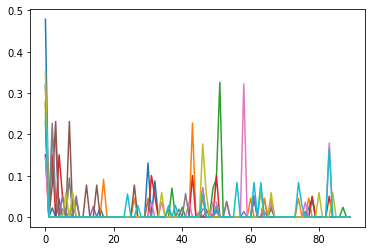

In [72]:
import skimage.io as io
img_dir='/datasets/home/30/230/psarangi/dataset_l/images/train2017/'
N=5
kld=np.zeros(10)
for iter in range(10):
    imgIds_perm=np.random.permutation(len(all_Ids))
    tmp=imgIds_perm[0:N].astype(int)
    tmp2=[all_Ids[t] for t in tmp]
    dataset.images=tmp2
    dataset.num_samples=len(dataset.images)
    sub_inst_cat=np.zeros(90)
    for j in range(N):
        sub_cat_lab=[]
        #print(dataset.images[j],all_Ids[imgIds_perm[j]])
        img = dataset.coco.loadImgs(dataset.images[j])[0]
        #id_vec.append(img['id'])
        f_name=img_dir
        f_name+=img['file_name']
        print(f_name)
        I = io.imread(f_name)
        #print(img['coco_url'])
        #plt.figure()
        #plt.imshow(I)
        annIds = dataset.coco.getAnnIds(imgIds=img['id'])
        anns = dataset.coco.loadAnns(annIds)
        sub_cat_lab=[k['category_id'] for k in anns]
        for jj in range(90):
            t=np.where(np.asarray(sub_cat_lab)==jj)
            sub_inst_cat[jj-1]+=t[0].shape[0]
    #print(sub_inst_cat/np.sum(sub_inst_cat),np.sum(sub_inst_cat))
    prob_sub=(sub_inst_cat+1)/np.sum(sub_inst_cat+1)
    #print(np.log(prob1/(prob_sub+0.001)))
    #kld[iter]=np.sum(prob1*np.log(prob1/prob_sub))
    
    plt.plot(sub_inst_cat/(np.sum(sub_inst_cat)))
    print(dataset.images)
    #plt.show()
#plt.figure()
#print(kld)
#x=np.arange(90)
#print(x.shape,prob1[0,:].shape)
#plt.plot(x,prob1[0,:])